# Power spectrum plot
This notebook is the code for plotting the power spectrum using the powerbox package.

## Redshift z=0
The first cell..
* imports all the packages
* gets the snapshot, galaxy catalogue, galaxy positions (x,y,z) and the HI mass
* Additional variables can be pulled from the galaxy catalgue but these are the only ones needed for the PS.

In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)
gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True, pandas=False)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values
snaplist = meraxes.io.read_snaplist(fname_in, h)    

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

# using positions [x,y,x]
Pos = gals["Pos"]
pos_x = Pos[0]
pos_y = Pos[1]
pos_z = Pos[2]
HIMass = gals["HIMass"]

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


## Redshift z=4

In [2]:
# Redshift = 4
#get gals, snaps, sims_props
snapshot_used_4 = 115 # z = 0
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)
gals_4, sim_props_4 = meraxes.read_gals(fname_in, snapshot_used_4, sim_props=True, pandas=False)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values
snaplist_4 = meraxes.io.read_snaplist(fname_in, h)    

# See other available Snaps and Redshifts
reds_4 = snaplist_4[1]
snaps_4 = snaplist_4[0]
print(reds_4)
print(snaps_4)

# using positions [x,y,x]
Pos_4 = gals_4["Pos"]
pos_x_4 = Pos_4[0]
pos_y_4 = Pos_4[1]
pos_z_4 = Pos_4[2]
HIMass_4 = gals_4["HIMass"]

snaplist_index_used_4 = list(snaplist_4[0]).index(snapshot_used_4)# convert to list and find the index of the snap we are using
redshift_used_4 = snaplist_4[1][snaplist_index_used_4] # Get the redshift for corresponding snapshot
redshift_used_4 = str(round(redshift_used_4, 1)) # round float to nearest whole int

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


## Calculates the HI weighted power spectrum for Redshift z=0
The full definition of this function is shown here, in case any additional parameters need to be added:

def get_power(deltax, boxlength, deltax2=None, N=None, a=1., b=1., remove_shotnoise=True,
              vol_normalised_power=True, bins=None, res_ndim=None, weights=None, weights2=None,
              dimensionless=True, bin_ave=True, get_variance=False, log_bins=False, ignore_zero_mode=False,
              k_weights = 1,
              ):

This function calculates the isotropic power spectrum of a given field, or cross-power of two similar fields.

This function, by default, conforms to typical cosmological power spectrum conventions -- normalising by the volume of the box and removing shot noise if applicable. These options are configurable.

### The steps of the function are as follows:
1. Check if the input data is in sampled particle format
2. Generate a histogram of the data, with appropriate number of bins (uses histogramdd)
3. Convert sampled data to mean-zero data
4. If input data is already a density field, just get the dimensions.
5. Calculate the n-D power spectrum and align it with the k from powerbox.
6. Determine a nice number of bins.
7. Set k_weights so that k=0 mode is ignore if desired.
8. res is (P, k, < var >)
9. Remove shot-noise

In [7]:
#REDSHIFT 0 
# (Pos, 100 ... where 100 is the box length
pkhi,khi = pbox.get_power(Pos,100,remove_shotnoise=False,N=100,bins=100,weights=HIMass)
pkhi

array([6.44213431e-27, 3.90811645e+03, 1.14039467e+03, 7.01783102e+02,
       3.49460540e+02, 2.26983330e+02, 1.73305467e+02, 1.59556965e+02,
       1.40857563e+02, 1.15170764e+02, 8.50046321e+01, 7.12043551e+01,
       6.40167786e+01, 5.63631495e+01, 4.51067337e+01, 4.47973990e+01,
       3.81787892e+01, 3.25181722e+01, 2.99603338e+01, 2.56445335e+01,
       2.24449526e+01, 1.96464780e+01, 1.77887330e+01, 1.65095421e+01,
       1.42703050e+01, 1.26418171e+01, 1.16468220e+01, 1.05707245e+01,
       9.54898096e+00, 8.73147408e+00, 7.89777250e+00, 7.16635513e+00,
       6.51856133e+00, 5.98339077e+00, 5.46724933e+00, 5.08482561e+00,
       4.64613171e+00, 4.30337329e+00, 3.98231512e+00, 3.79190621e+00,
       3.47858587e+00, 3.27152371e+00, 3.04881868e+00, 2.81863976e+00,
       2.67416526e+00, 2.47386881e+00, 2.36137215e+00, 2.21755610e+00,
       2.11362556e+00, 2.04304773e+00, 1.88851251e+00, 1.85340443e+00,
       1.74929356e+00, 1.69075999e+00, 1.63433591e+00, 1.57113975e+00,
      

### Calculates the HI weighted power spectrum for Redshift z=4

In [4]:
#REDSHIFT 4
pkhi_4,khi_4 = pbox.get_power(Pos_4,100,remove_shotnoise=False,N=100,bins=100,weights=HIMass_4)
pkhi_4

array([1.07799005e-25, 3.77192230e+03, 8.78865046e+02, 3.96320968e+02,
       1.94039607e+02, 1.22381031e+02, 1.01144408e+02, 7.28386017e+01,
       6.40945176e+01, 5.48519494e+01, 3.72597671e+01, 3.70752190e+01,
       3.02422990e+01, 2.88685508e+01, 2.58163014e+01, 2.35041677e+01,
       2.13272235e+01, 1.97298559e+01, 1.71554040e+01, 1.60527068e+01,
       1.52222649e+01, 1.45180053e+01, 1.34533994e+01, 1.25910978e+01,
       1.18679693e+01, 1.14889546e+01, 1.12098559e+01, 9.98744896e+00,
       9.61057354e+00, 9.07523713e+00, 8.79739906e+00, 8.50258219e+00,
       8.27916903e+00, 7.92069288e+00, 7.79380984e+00, 7.45129173e+00,
       7.10828292e+00, 6.98667258e+00, 6.79964070e+00, 6.59823369e+00,
       6.45899866e+00, 6.20120008e+00, 6.07895277e+00, 5.95128464e+00,
       5.78008756e+00, 5.74045128e+00, 5.60540990e+00, 5.51380807e+00,
       5.50015252e+00, 5.30134765e+00, 5.27471121e+00, 5.11766194e+00,
       5.08502266e+00, 5.02645094e+00, 4.94745895e+00, 4.89290577e+00,
      

### Plot for the Power spectrum WITH LOG SCALE

for both z=0 (black) and z=4 (pink)
No range has been specified.

<ipython-input-8-5e1633d00efd>:10: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(khi_4),np.log10(pkhi_4),color="mediumvioletred", label=label_z_4)


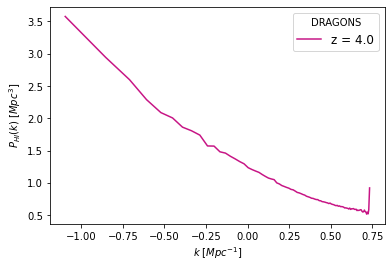

In [8]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
label_z_4 = ("z = " + redshift_used_4)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
#plt.xscale('log')
#plt.yscale('log')
ax.plot(np.log10(khi),np.log10(pkhi),color="black", label=label_z)
ax.plot(np.log10(khi_4),np.log10(pkhi_4),color="mediumvioletred", label=label_z_4)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_logged")
plt.savefig("plots/" + name_of_plot + ".pdf")

### Plot for the Power spectrum : NO LOG SCALE due to SET range
for both z=0 (black) and z=4 (pink)
The range has been set as x = (0.1 - 1 ) and y = (0,3500)

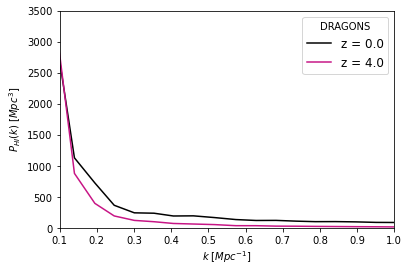

In [6]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
label_z_4 = ("z = " + redshift_used_4)
ax.set_ylim([0,3500])
ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
#plt.xscale('log')
#plt.yscale('log')
ax.plot(khi,pkhi,color="black", label=label_z)
ax.plot(khi_4,pkhi_4,color="mediumvioletred", label=label_z_4)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_test")
plt.savefig("plots/" + name_of_plot + ".pdf")